In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
path = 'F:\\Kaggle\\Fashion MNIST\\data\\'

In [109]:
train_data = pd.read_csv(path+'fashion-mnist_train.csv', encoding='utf8')

In [110]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
def imshow(imgs, idx):
    plt.figure(figsize=(10, 10))
    if len(train_data.shape) == 2:
        for i in range(len(idx)):
            plt.subplot(3,3,i+1)
            plt.imshow(imgs.iloc[idx[i]][1:].values.reshape((28,28)), cmap='gray')
            plt.gca().get_xaxis().set_ticks([])
            plt.gca().get_yaxis().set_ticks([])
            plt.ylabel('labeled=%d'%imgs.iloc[idx[i]][0], fontsize=18)
        else:
            plt.imshow(imgs.iloc[0, :][1: ].values.reshape((28,28)), cmap='gray')

In [112]:
rand_idx = np.random.randint(1, 60000, 9)
rand_idx

array([ 1391, 25027,  9412, 53792, 51827,  9179,  2738, 21436, 42027])

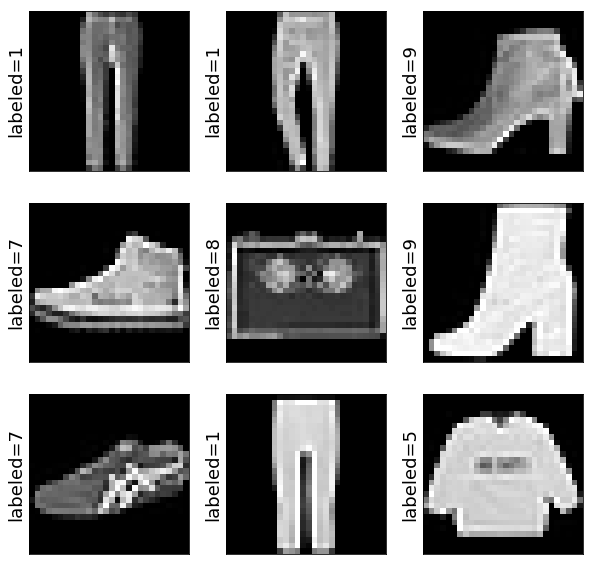

In [113]:
imshow(train_data, rand_idx)

In [137]:
def make_filters(depth=False, filter_sz=3, filter_n=2):
    filters = []
    if not depth:
        for flt in range(filter_n):
            filters.append(np.random.randn(filter_sz, filter_sz))       
        return filters
    else:
        for flt in range(filter_n):
            filters.append(np.random.randn(depth, filter_sz, filter_sz))
        return filters

In [158]:
def conv(img, filters):
    filter_sz = filters[0].shape[-1]
    if len(img.shape) == 2:
        img_h, img_w = img.shape
        conv_imgs = []
        for flt in filters:
            flt_img_h = img_h-filter_sz+1
            flt_img_w = img_w-filter_sz+1
            flt_img = np.zeros([flt_img_h, flt_img_w]); k=0
            for h in range(flt_img_h):
                for w in range(flt_img_w):
                    flt_img[h][w] = np.sum(np.dot(img[h: h+filter_sz, w: w+filter_sz], flt))
                    k+=1
            conv_imgs.append(flt_img)
    else:
        img_d, img_h, img_w = img.shape
        conv_imgs = []
        for flt in filters:
            flt_img_h = img_h-filter_sz+1
            flt_img_w = img_w-filter_sz+1
            flt_img = np.zeros([flt_img_h, flt_img_w]); k=0
            for h in range(flt_img_h):
                for w in range(flt_img_w):
                    flt_img[h][w] = np.sum(np.dot(img[:, h: h+filter_sz, w: w+filter_sz], flt))
                    k+=1
            conv_imgs.append(flt_img)
    return np.array(conv_imgs)

In [247]:
def non_linearity(arr, act_type='relu'):
    if act_type == 'relu':
        return np.maximum(0, arr)
    elif act_type == 'sigmoid':
        return 1/(1+np.exp(-arr))

In [ ]:
def dense(act, weights):
    return np.dot(act, weights)

In [156]:
img = train_data.iloc[0, :][1:].values.reshape((28,28))
img.shape

(28, 28)

In [163]:
filters_01 = make_filters(filter_sz=3, filter_n=5)
conv_imgs_01 = conv(img, filters_01)
conv_imgs_01.shape

(5, 26, 26)

In [165]:
filters_02 = make_filters(depth=5, filter_sz=3, filter_n=10)
conv_imgs_02 = conv(conv_imgs_01, filters_02)
conv_imgs_02.shape

(10, 24, 24)

In [166]:
filters_03 = make_filters(depth=10, filter_sz=3, filter_n=20)
conv_imgs_03 = conv(conv_imgs_02, filters_03)
conv_imgs_03.shape

(20, 22, 22)

In [89]:
k = 0
img_d = 2
flt = filters_02[0]
#flt = np.zeros([3,3])
#flt = np.ones([3,3])
a = conv_imgs_01
b = conv_imgs.shape
c = np.zeros([24, 24])
for i in range(b[1]-2):
    for j in range(b[2]-2):
        #print(a[i:i+3, j:j+3])
        #print(flt)
        #print(np.dot(a[i:i+3, j:j+3], flt))
        #print(np.sum(np.dot(a[i:i+3, j:j+3], flt)))
        c[i][j] = np.sum(np.dot(a[:, i:i+3, j:j+3], flt))
        #print(c)
        #print()
        k+=1

In [57]:
#a[:,:,2]